## DATA ANALYSIS

In [2]:
#Required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
path ='dataset_diabetes.csv'
data = pd.read_csv( path, index_col=0, encoding = "ISO-8859-1")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
663,9,145,80,46,130,37.9,0.637,40,1
664,6,115,60,39,0,33.7,0.245,40,1
665,1,112,80,45,132,34.8,0.217,24,0
666,4,145,82,18,0,32.5,0.235,70,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## DATA PREPROCESSING

In [4]:

data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
663,9,145.0,80.0,46.0,130.0,37.9,0.637,40,1
664,6,115.0,60.0,39.0,NaN,33.7,0.245,40,1
665,1,112.0,80.0,45.0,132.0,34.8,0.217,24,0
666,4,145.0,82.0,18.0,NaN,32.5,0.235,70,1


In [5]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = data.columns
columns = columns.drop('Outcome')
for i in columns:
    median_target(i)
    data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = median_target(i)[i][0]
    data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = median_target(i)[i][1]


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,173.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,173.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
663,9,145.0,80.0,46.0,130.0,37.9,0.637,40,1
664,6,115.0,60.0,39.0,173.0,33.7,0.245,40,1
665,1,112.0,80.0,45.0,132.0,34.8,0.217,24,0
666,4,145.0,82.0,18.0,173.0,32.5,0.235,70,1


In [8]:
data["Outcome"].value_counts()*100/len(data)

0    65.419162
1    34.580838
Name: Outcome, dtype: float64

In [9]:
data.Outcome.value_counts()

0    437
1    231
Name: Outcome, dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

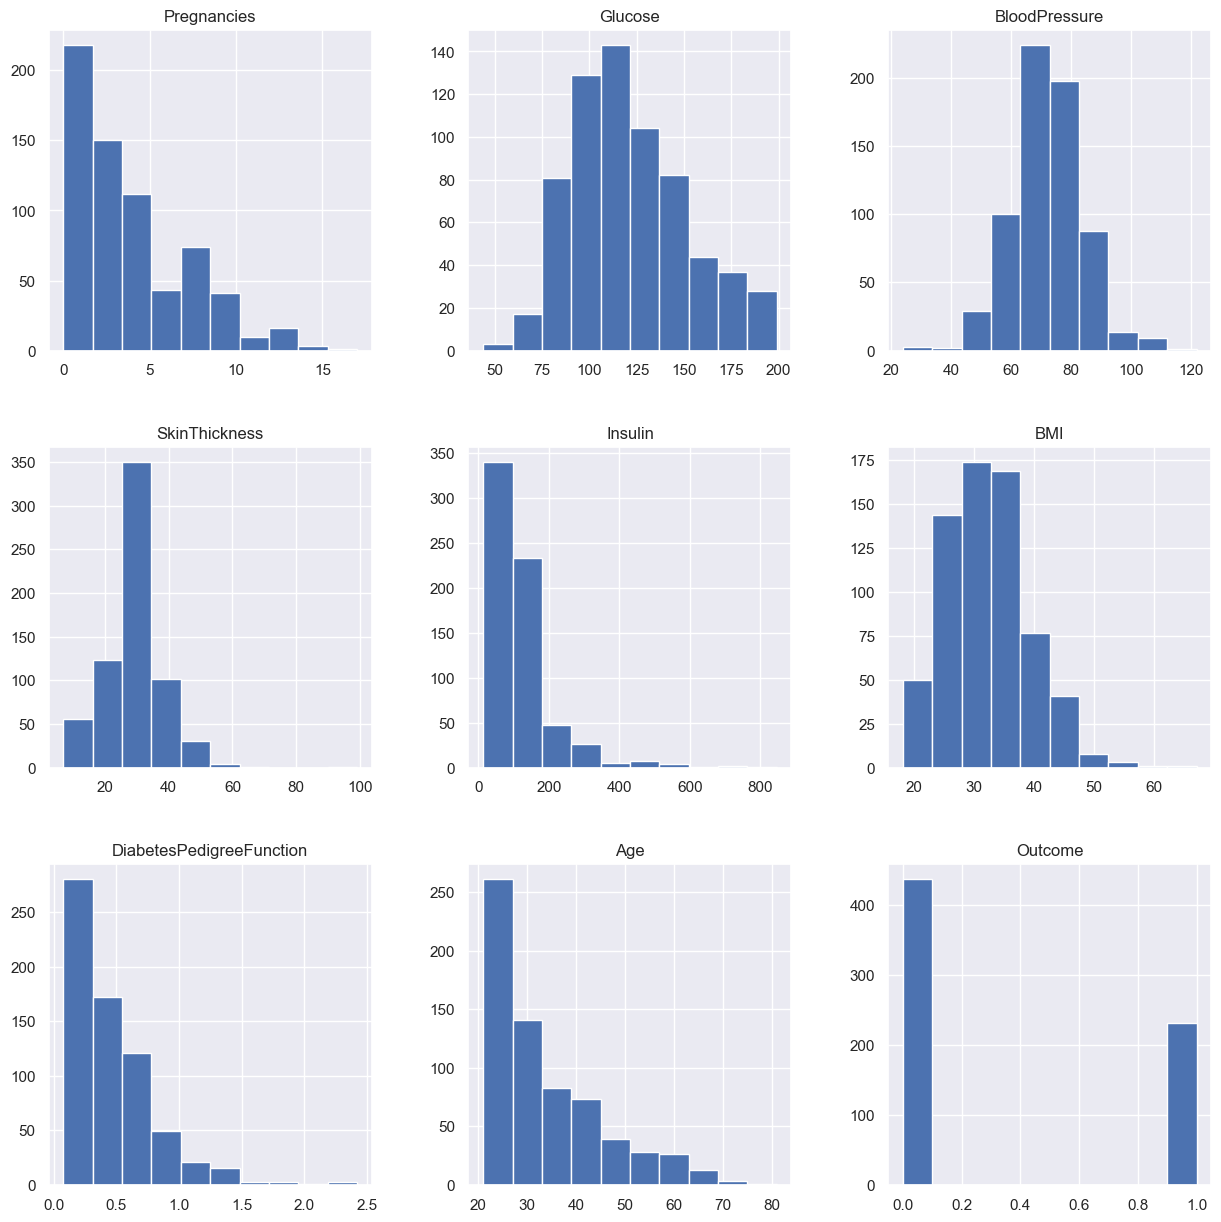

In [21]:
data.hist(figsize = (15,15))

C:\Users\Responsable\AppData\Local\Temp\ipykernel_10548\1942839600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], bins=30)#(81-21)/2=30


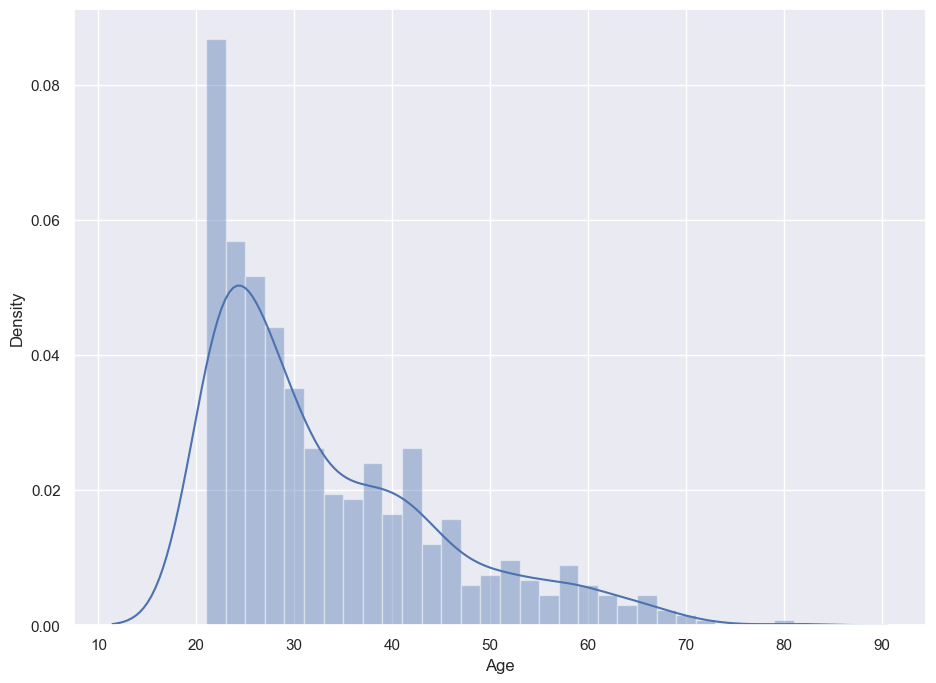

In [10]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(data['Age'], bins=30)#(81-21)/2=30
plt.show()

<Axes: >

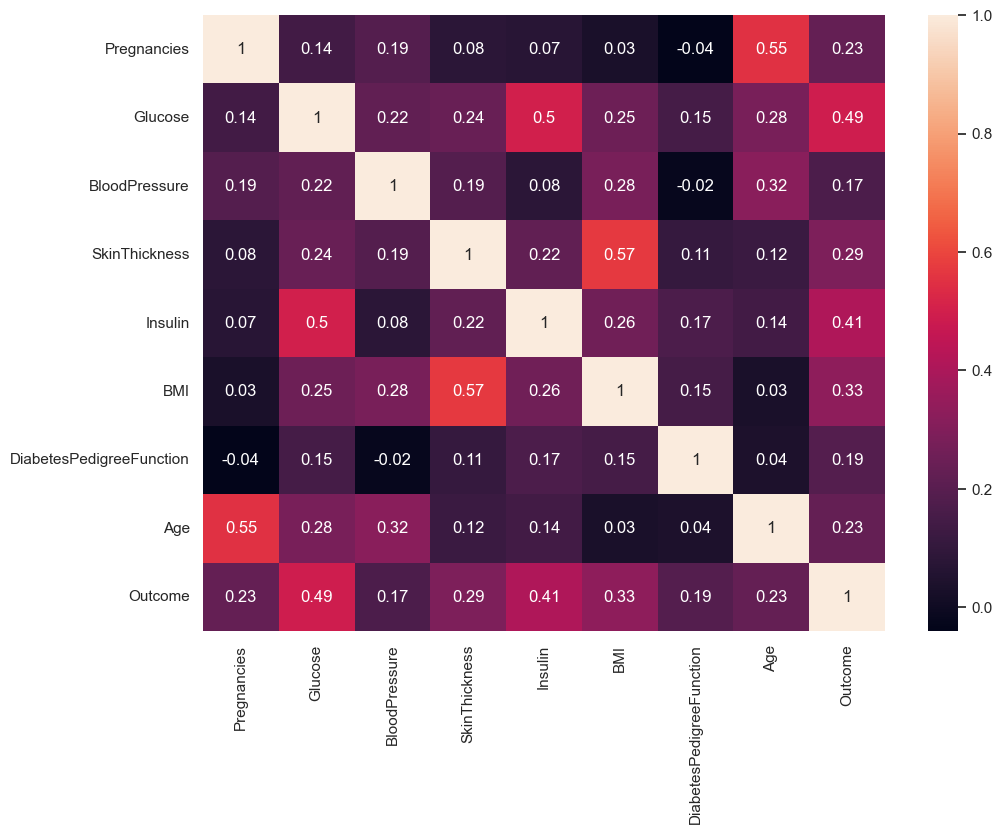

In [11]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

## MODELING

### 80% to train the data and 20% to test the data 

In [12]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)


In [13]:
X=data.drop("Outcome", axis=1)
Y=data["Outcome"]

##### Régression logistique (LR)
##### K-plus proches voisins (KNN)
##### Arbres de classification et de régression (CART)
##### Forêt aléatoire (RF)
##### Machine à vecteurs de support (SVM) avec noyau à fonction de base radiale
##### Extreme Gradient Boosting (XGB)
##### Gradient Boosting Machine (GBM)
##### LightGBM

In [20]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GBM',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Responsable\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Responsable\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

LR: 0.778539 (0.040683)
KNN: 0.851809 (0.041537)
CART: 0.850384 (0.036879)
RF: 0.875848 (0.033214)
SVR: 0.654274 (0.067517)
XGBM: 0.884826 (0.039317)
GBM: 0.889281 (0.034004)
LightGBM: 0.883333 (0.037421)


In [91]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)                                            
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [92]:
gbm_train = gbm.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, gbm_train)))

Accuracy_Score = 1.0


In [93]:
predictions = gbm.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.95


## MODEL TESTING WITH NEW DATA

In [84]:
path ='data_diabet_test.csv'
data1= pd.read_csv( path, index_col=0, encoding = "ISO-8859-1")
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
669,9,154,78,30,100,30.9,0.164,45,0
670,6,165,68,26,168,33.6,0.631,49,0
671,1,99,58,10,0,25.4,0.551,21,0
672,10,68,106,23,49,35.5,0.285,47,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [85]:
data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58.0,33.0,190.0,34.0,0.430,43,0
669,9,154,78.0,30.0,100.0,30.9,0.164,45,0
670,6,165,68.0,26.0,168.0,33.6,0.631,49,0
671,1,99,58.0,10.0,NaN,25.4,0.551,21,0
672,10,68,106.0,23.0,49.0,35.5,0.285,47,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126,60.0,NaN,NaN,30.1,0.349,47,1


In [86]:
def median_target(var):   
    temp = data1[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = data1.columns
columns = columns.drop('Outcome')
for i in columns:
    median_target(i)
    data1.loc[(data1['Outcome'] == 0 ) & (data1[i].isnull()), i] = median_target(i)[i][0]
    data1.loc[(data1['Outcome'] == 1 ) & (data1[i].isnull()), i] = median_target(i)[i][1]


In [63]:
data1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
X_test2 = data1.drop('Outcome', axis=1)
y_test2 = data1['Outcome']


predictions = gbm.predict(X_test2)
accuracy_DT = accuracy_score(y_test2, predictions)
print("Ransom Forest Accuracy_Score =", format(accuracy_DT))

Ransom Forest Accuracy_Score = 0.99
